# HW01

## 20145071 Junghoon Seo

<img src='./Screenshot from 2016-10-20 06:22:08.png'>

### Let us see the analytic solution.

<img src = './qsTqd9y.jpg'>

In [1]:
from math import exp, sqrt
from __future__ import division

# Analytics functions

def x_1(t):
    _ = exp((-1/2)*(1+sqrt(69))*t)
    __ = ((sqrt(69)-15)*exp(sqrt(69)*t)+15+sqrt(69))
    ___ = 2*sqrt(69)
    return -(_ * __ / ___)

def x_2(t):
    _ = exp((-1/2)*(1+sqrt(69))*t)
    __ = ((3*sqrt(69)-19)*exp(sqrt(69)*t)+19+3*sqrt(69))
    ___ = 2*sqrt(69)
    return _ * __ / ___

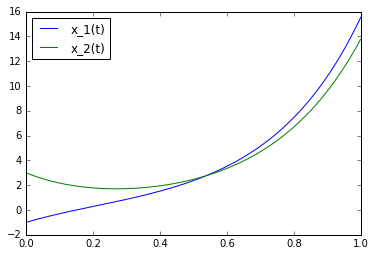

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.linspace(0., 1., 100000)

plt.plot(x_axis, map(x_1, x_axis))
plt.plot(x_axis, map(x_2, x_axis))

plt.legend(['x_1(t)', 'x_2(t)'], loc='upper left')

plt.show()

### Matrix ordinary differnetial equation

In [3]:
def f_row_1(x1, x2):
    return float(x1) + 3*x2

def f_row_2(x1, x2):
    return 5*float(x1) - 2*x2

### Implement each numerical analysis function

## 1) Euler's method

In [4]:
# Euler's method
def euler(x1_initial_value, x2_initial_value, step_size, solution_interval):
    h = step_size
    start = solution_interval[0]
    end = solution_interval[1]
    x1 = np.zeros(int((end-start)/h) + 1)
    x2 = np.zeros(int((end-start)/h) + 1)
    
    x1[0] = x1_initial_value
    x2[0] = x2_initial_value
    
    for i in range(1, int((end-start)/h) + 1):
        x1[i] = x1[i-1] + h*(f_row_1(x1[i-1], x2[i-1]))
        x2[i] = x2[i-1] + h*(f_row_2(x1[i-1], x2[i-1]))
        
    return (x1, x2)

In [5]:
x_1, x_2 = euler(-1, 3, 1e-5, (0., 1.))

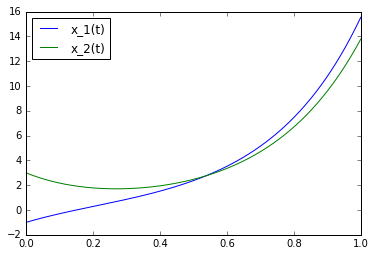

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.linspace(0., 1., 100000)
plt.plot(x_axis, x_1, label = "x_1") 
plt.plot(x_axis, x_2, label = "x_2")

plt.legend(['x_1(t)', 'x_2(t)'], loc='upper left')

plt.show()

## 2) Taylor series method of order 2

In [7]:
def f_row_1_prime(x1, x2):
    return f_row_1(x1, x2) + 3*f_row_2(x1, x2)

def f_row_2_prime(x1, x2):
    return 5*f_row_1(x1, x2) - 2*f_row_2(x1, x2)

# Taylor series method of order 2
def taylor_series(x1_initial_value, x2_initial_value, step_size, solution_interval):
    h = step_size
    start = solution_interval[0]
    end = solution_interval[1]
    x1 = np.zeros(int((end-start)/h) + 1)
    x2 = np.zeros(int((end-start)/h) + 1)
    
    x1[0] = x1_initial_value
    x2[0] = x2_initial_value
    
    for i in range(1, int((end-start)/h) + 1):
        x1[i] = x1[i-1] + h*(f_row_1(x1[i-1], x2[i-1])) + (h*h/2)*f_row_1_prime(x1[i-1], x2[i-1])
        x2[i] = x2[i-1] + h*(f_row_2(x1[i-1], x2[i-1])) + (h*h/2)*f_row_2_prime(x1[i-1], x2[i-1])
        
    return (x1, x2)

In [8]:
x_1, x_2 = taylor_series(-1, 3, 1e-5, (0., 1.))

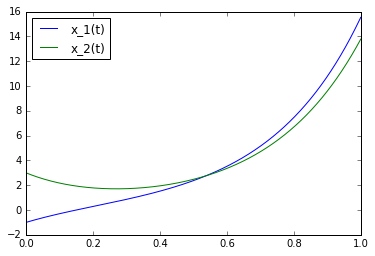

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.linspace(0., 1., 100000)
plt.plot(x_axis, x_1, label = "x_1") 
plt.plot(x_axis, x_2, label = "x_2")

plt.legend(['x_1(t)', 'x_2(t)'], loc='upper left')

plt.show()

## 3) Runge-Kutta Order Four

In [10]:
# Runge-Kutta Order Four
def runge_kutta(x1_initial_value, x2_initial_value, step_size, solution_interval):
    h = step_size
    start = solution_interval[0]
    end = solution_interval[1]
    x1 = np.zeros(int((end-start)/h) + 1)
    x2 = np.zeros(int((end-start)/h) + 1)
    
    x1[0] = x1_initial_value
    x2[0] = x2_initial_value
    
    for i in range(1, int((end-start)/h) + 1):
        k_1 = h * f_row_1(x1[i-1], x2[i-1])
        k_2 = h * f_row_1(x1[i-1] + k_1/2, x2[i-1] + k_1/2)
        k_3 = h * f_row_1(x1[i-1] + k_2/2, x2[i-1] + k_2/2)
        k_4 = h * f_row_1(x1[i-1] + k_3, x2[i-1] + k_3)
        x1[i] = x1[i-1] + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        
        k_1 = h * f_row_2(x1[i-1], x2[i-1])
        k_2 = h * f_row_2(x1[i-1] + k_1/2, x2[i-1] + k_1/2)
        k_3 = h * f_row_2(x1[i-1] + k_2/2, x2[i-1] + k_2/2)
        k_4 = h * f_row_2(x1[i-1] + k_3, x2[i-1] + k_3)
        x2[i] = x2[i-1] + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        
    return (x1, x2)

In [11]:
x_1, x_2 = runge_kutta(-1, 3, 1e-5, (0., 1.))

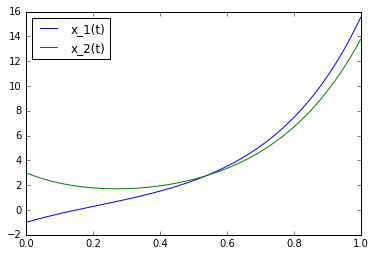

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.linspace(0., 1., 100000)
plt.plot(x_axis, x_1, label = "x_1") 
plt.plot(x_axis, x_2, label = "x_2")

plt.legend(['x_1(t)', 'x_2(t)'], loc='upper left')

plt.show()

## 4) Predictor-corrector

### For 4), let me introduce fourth-order Adams-Bashforth technique and fourth order Adams-Moulton technique

<img src = './Screenshot from 2016-10-20 23:44:46.png'>

In [13]:
# Runge-Kutta Order Four
def predict_correct(x1_initial_value, x2_initial_value, n, solution_interval):
    start = solution_interval[0]
    end = solution_interval[1]
    h = (end - start)/n
    axis = np.zeros(n + 1)
    axis[0] = 0
    axis[1] = h
    axis[2] = 2*h
    
    x1 = np.zeros(n + 1)
    x2 = np.zeros(n + 1)    
    x1[0] = x1_initial_value
    x2[0] = x2_initial_value
    x1[1] = x1[0] + h * f_row_1(x1[0], x2[0])
    x1[2] = x1[1] + h * f_row_1(x1[1], x2[1])
    x2[1] = x2[0] + h * f_row_2(x1[0], x2[0])
    
    # x1[-1] = x1[-2] = x1[-3] = x2[-1] = x2[-2] = 0
    for i in range(1, n + 1):
        if axis[i-1] > 1.:
            break
        x1[i] = x1[i-1] + h/24*(55*f_row_1(x1[i-1], x2[i-1])-59*f_row_1(x1[i-2], x2[i-2])+37*f_row_1(x1[i-3], x2[i-3])-9*f_row_1(x1[i-4], x2[i-4]))
        x2[i] = x2[i-1] + h/24*(55*f_row_2(x1[i-1], x2[i-1])-59*f_row_2(x1[i-2], x2[i-2])+37*f_row_2(x1[i-3], x2[i-3])-9*f_row_2(x1[i-4], x2[i-4]))
        
        diff1 = x1[i] - (x1[i-1] + h/24*(9*f_row_1(x1[i], x2[i])+19*f_row_1(x1[i-1], x2[i-1])-5*f_row_1(x1[i-2], x2[i-2])+f_row_1(x1[i-3], x2[i-3])))
        diff2 = x2[i] - (x2[i-1] + h/24*(9*f_row_2(x1[i], x2[i])+19*f_row_2(x1[i-1], x2[i-1])-5*f_row_2(x1[i-2], x2[i-2])+f_row_2(x1[i-3], x2[i-3])))
        
        # if corrector equation is not satified, reduce the step size.
        if (abs(diff1) > 1e-8) or (abs(diff2) > 1e-8):
            h = h / 2
        else:
            h = h * 2
        
        axis[i+1] = axis[i] + h
            
    return (axis[:i], x1[:i], x2[:i])

In [14]:
x_axis, x_1, x_2 = predict_correct(-1, 3, 1000000, (0., 1.))

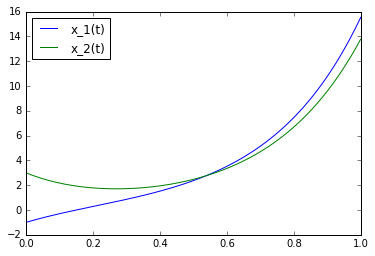

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x_axis[1:-2], x_1[1:-2], label = "x_1") 
plt.plot(x_axis[1:-2], x_2[1:-2], label = "x_2")

plt.legend(['x_1(t)', 'x_2(t)'], loc='upper left')

plt.show()

### Let's compare error of each method with analytic function, except predict-correct.
### (Result of predict-correct method depends on user-arbitary error bound)

In [16]:
# Analytic function again
def x_1(t):
    _ = exp((-1/2)*(1+sqrt(69))*t)
    __ = ((sqrt(69)-15)*exp(sqrt(69)*t)+15+sqrt(69))
    ___ = 2*sqrt(69)
    return -(_ * __ / ___)

def x_2(t):
    _ = exp((-1/2)*(1+sqrt(69))*t)
    __ = ((3*sqrt(69)-19)*exp(sqrt(69)*t)+19+3*sqrt(69))
    ___ = 2*sqrt(69)
    return _ * __ / ___

In [17]:
x_axis = np.linspace(0., 1., 100000)

analytic_x_1, analytic_x_2 = map(x_1, x_axis), map(x_2, x_axis)
euler_x_1, euler_x_2 = euler(-1, 3, 1e-5, (0., 1.))
taylor_x_1, taylor_x_2 = taylor_series(-1, 3, 1e-5, (0., 1.))
rk_x_1, rk_x_2 = runge_kutta(-1, 3, 1e-5, (0., 1.))

In [18]:
def MSE(f, g):
    return np.sum(((f-g)**2))/100000

In [19]:
print(MSE(analytic_x_1, euler_x_1), MSE(analytic_x_2, euler_x_2))
print(MSE(analytic_x_1, taylor_x_1), MSE(analytic_x_2, taylor_x_2))
print(MSE(analytic_x_1, rk_x_1), MSE(analytic_x_2, rk_x_2))

(2.6844731819942809e-07, 2.1287285425470967e-07)
(3.4064712875364461e-08, 2.5919688395538015e-08)
(1.8984002441074448e-08, 1.9599135646715372e-08)


### As known, error bound is the following:
## Runge-Kutta method < Taylor series method < Euler method